## 머신 러닝 실습
### 텍스트 마이닝
#### 데이터 수집
##### 네이버 코로나 뉴스로 감성분석

In [10]:
# 필요 라이브러리 등록
import json
import pandas as pd
import re

In [11]:
with open('./data/코로나_naver_news.json',encoding='utf-8') as f:
    data = json.load(f)

In [12]:
df_data = pd.DataFrame(data)

In [6]:
df_data.head()

,cnt,description,pDate,title
0,1,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",2020-06-04 14:12:00,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;
1,2,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,2020-06-04 14:12:00,"창녕군, ‘창녕형’비대면 선별진료소 운영"
2,3,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",2020-06-04 14:12:00,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정"
3,4,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,2020-06-04 14:12:00,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]
4,5,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,2020-06-04 14:12:00,"이재갑 장관, 고용안정지원금 서울센터 방문"


In [13]:
##  title과 dscription 칼럼에서 한글 이외의 것은 다 제거하는 작업
df_data['title'] = df_data['title'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+',' ',x))

In [14]:
df_data['description'] = df_data['description'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+',' ',x))

In [15]:
df_data.head()

,cnt,description,pDate,title
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문


In [13]:
df_data[['title','pDate','description']].to_excel('./data/코로나뉴스_전처리.xlsx',index=False)

In [14]:
df_data = pd.read_excel('./data/코로나뉴스_전처리.xlsx')

In [16]:
df_data.head()

,title,pDate,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...


##### 감석 분석 모델 재구축

In [17]:
## 훈련용 데이터 가져오기
df_nsmc_train = pd.read_csv('../day12/data/ratings_train.txt',engine='python',sep='\t',encoding='utf-8')

In [24]:
# document에서 빈값 제거 하기
df_nsmc_train = df_nsmc_train[df_nsmc_train['document'].notnull()]

In [22]:
## document 칼럼에서 한글 이외에 제거
df_nsmc_train['document'] = df_nsmc_train['document'].apply(lambda x : re.sub(r'[^가-힣|ㄱ-]+',' ',x))

In [27]:
# 한글 제거 후에 'documnet'이 빈 행이 있을 수 있으므로 다시 제거 해주기
df_nsmc_train = df_nsmc_train[df_nsmc_train['document'] != ' ']

In [16]:
## 벡터화 하기 위한 모듈과 로지스틱 회귀를 하기 위한 모듈 등록
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [70]:
okt = Okt()

In [84]:
def oktToken(text):
    tokens = okt.morphs(text)
    return tokens

In [36]:
# 벡터화 시켜주는 객체 생성
tfidf = TfidfVectorizer(tokenizer=oktToken,ngram_range=(1,2),min_df=3,max_df=0.9)

In [37]:
tfidf.fit(df_nsmc_train['document'])
nsmc_train_tfidf = tfidf.transform(df_nsmc_train['document'])

g:\DEV\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
nsmc_train_tfidf

<148434x113939 sparse matrix of type '<class 'numpy.float64'>'
	with 2681545 stored elements in Compressed Sparse Row format>

In [39]:
## 로지스틱 회귀 모델 생성
model = LogisticRegression(random_state=0,C=3.5,)

In [40]:
model.get_params()

{'C': 3.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
model.fit(nsmc_train_tfidf,df_nsmc_train['label'])

g:\DEV\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.5, random_state=0)

##### 네이버 뉴스 타이틀로 감성 분석

In [ ]:
# 분석할 데이터의 벡터화
data_title_tfidf = tfidf.transform(df_data['title'])

In [46]:
# 감성 분석(로지스틱 회귀)
title_predict = model.predict(data_title_tfidf)

In [ ]:
# 감성 분석 결과 DF 저장
df_data['title_label'] = title_predict
 

In [17]:
df_data.head()

,cnt,description,pDate,title
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문


In [51]:
# 분석할 데이터의 벡터화
data_description_tfidf = tfidf.transform(df_data['description'])

In [52]:
# 감성 분석(로지스틱 회귀)
title_description = model.predict(data_description_tfidf)

In [53]:
df_data['desc_label'] = title_description

In [58]:
df_data.tail()

,title,pDate,description,title_label,desc_label
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,2020-06-04 13:36:00,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,0,0
796,중부발전 소규모 태양광사업자 판매대금 선 지급,2020-06-04 13:36:00,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,1,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,2020-06-04 13:36:00,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,1,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,2020-06-04 13:36:00,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,0,1
799,포토|대종상영화제 문가영 발랄 듬 뿍,2020-06-04 13:36:00,제 회 대종상영화제 참석한 문가영제 회 대종상영화제 참석한 문가영 코로나 여파로 무...,0,0


In [59]:
df_data.to_excel('./data/코로나뉴스_감성분석_결과.xlsx',index=False)

##### 시각화

In [2]:
df_result = pd.read_excel('./data/코로나뉴스_감성분석_결과.xlsx')

In [60]:
# 타이틀의 감성별 갯수
df_result['title_label'].value_counts()

title_label
0    485
1    315
Name: count, dtype: int64

In [64]:
# 기사 내용의 감성별 갯수
df_result['desc_label'].value_counts()

desc_label
0    441
1    359
Name: count, dtype: int64

In [3]:
## 긍정적 감성의 결과과 부정적 감성의 결과를 분리
column_names = df_result.columns.tolist()

In [4]:
column_names.remove('pDate')

In [5]:
column_names

['title', 'description', 'title_label', 'desc_label']

In [61]:
# 빈 DF생성
df_positive_data = pd.DataFrame(columns=column_names)
df_negative_data = pd.DataFrame(columns=column_names)

#description_label이 긍정인지 부정인지 따라 df_positive_data와 df_negative_data에 나눠서 할당
for i, data in df_result.iterrows():
    title = data['title']
    description = data['description']
    title_label = data['title_label']
    description_label = data['desc_label']

    if description_label == 1: # 긍정 감성 데이터만 추출
        df_temp = pd.DataFrame([[title,description,title_label,description_label]])
        df_temp.columns = column_names
        df_positive_data = pd.concat([df_positive_data,df_temp],axis=0)

    elif description_label == 0: # 부정 감성 데이터만 추출
        df_temp = pd.DataFrame([[title,description,title_label,description_label]])
        df_temp.columns = column_names
        df_negative_data = pd.concat([df_negative_data,df_temp],axis=0)





In [62]:
df_positive_data.head()

,title,description,title_label,desc_label
0,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,1
0,경기도의회 농정해양위 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구,한편 코로나 로 인한 해외의 식재료 사재기에서 보듯이 국민들의 먹거리를 안정적으로 ...,1,1
0,당신이 아는 미술 시장이 아는 미술 한국 현대 미술 시장을 이끄는 작가,최근 갤러리 현대 창업 주년 기념전에 이 작품이 전시되자 코로나 의 영향에도 마스크...,1,1
0,상반기 신입 및 경력직 공채 시행,코로나 감안해 차 면접 비대면 역량검사 도입 국내 최대 치킨 프랜차이즈인 제너시스...,0,1
0,미소짓는 의료진,일 오후 서울 중랑구 서울의료원에서 열린 서울의료원 잠시멈춤 콘서트 에서 신종 코...,1,1


In [63]:
df_negative_data.head()

,title,description,title_label,desc_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
0,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
0,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1,0
0,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1,0
0,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지 않...,1,0


In [64]:
len(df_positive_data),len(df_negative_data)

(359, 441)

In [68]:
# 긍정 데이터에서 단어 추출
pos_descriptions = df_positive_data['description']

In [71]:
pos_description_words = []
for d in pos_descriptions:
    pos_description_words.append(okt.nouns(d)) # 명사 형태에서만 추출

In [73]:
final_pos_description_words = []

for d in pos_description_words:
    d2 = [w for w in d if len(w) > 1] # 글자 길이가 1보다 큰 것만 추출
    final_pos_description_words.append(' '.join(d2))

In [ ]:
final_pos_description_words

In [75]:
negative_descriptions = df_negative_data['description']

In [78]:
neg_descriptions_words = []
for d in negative_descriptions:
    neg_descriptions_words.append(okt.nouns(d))

In [79]:
final_neg_description_words = []

for d in neg_descriptions_words:
    d2 = [w for w in d if len(w) > 1]
    final_neg_description_words.append(' '.join(d2))

In [ ]:
final_pos_description_words

In [ ]:
final_neg_description_words

In [86]:
## TF-IDF 기반 단어별 출현빈도 계산
posTfidf = TfidfVectorizer(tokenizer=oktToken,min_df=2)

In [118]:
negTFidef = TfidfVectorizer(tokenizer=oktToken,min_df=2)

In [87]:
posDtm = posTfidf.fit_transform(final_pos_description_words)

g:\DEV\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [119]:
negDtm = negTFidef.fit_transform(final_neg_description_words)

g:\DEV\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [91]:
pos_vocas = dict()

for i, word in enumerate(posTfidf.get_feature_names_out()):
    pos_vocas[word] = posDtm.getcol(i).sum() # 해당 단어의 빈도수

In [120]:
neg_vocas = dict()

for i, word in enumerate(negTFidef.get_feature_names_out()):
    neg_vocas[word] = negDtm.getcol(i).sum() # 해당 단어의 빈도수

In [94]:
# 빈도수가 높은 것부터 정렬
pos_words = sorted(pos_vocas.items(),key=(lambda x : x[1]), reverse=True)

In [121]:
neg_words = sorted(neg_vocas.items(),key=(lambda x : x[1]), reverse=True)

In [ ]:
pos_words

In [ ]:
neg_words

In [98]:
## 차트 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
#한글 깨짐 문제 해결
from matplotlib import rcParams,font_manager,rc
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

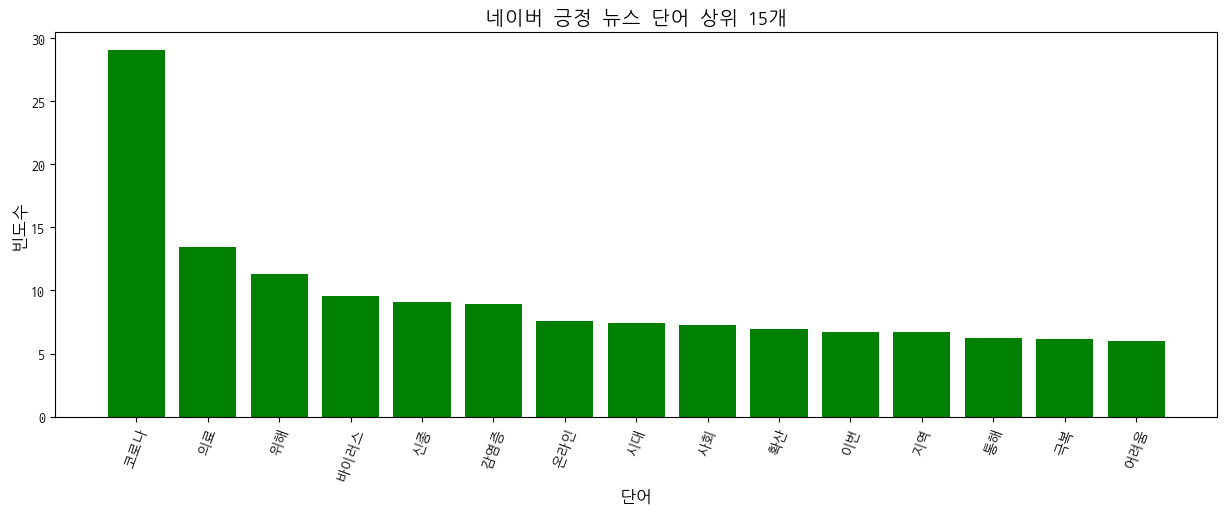

In [113]:
max = 15
plt.figure(figsize=(15,5))
plt.bar(range(max),[i[1] for i in pos_words[:max]],color='green')
plt.title('네이버 긍정 뉴스 단어 상위 15개',fontsize=14)
plt.xlabel('단어',fontsize=12)
plt.ylabel('빈도수',fontsize=12)
# x축 단어 표시
plt.xticks(range(max), [i[0] for i in pos_words[:max]],rotation=70)
plt.show()

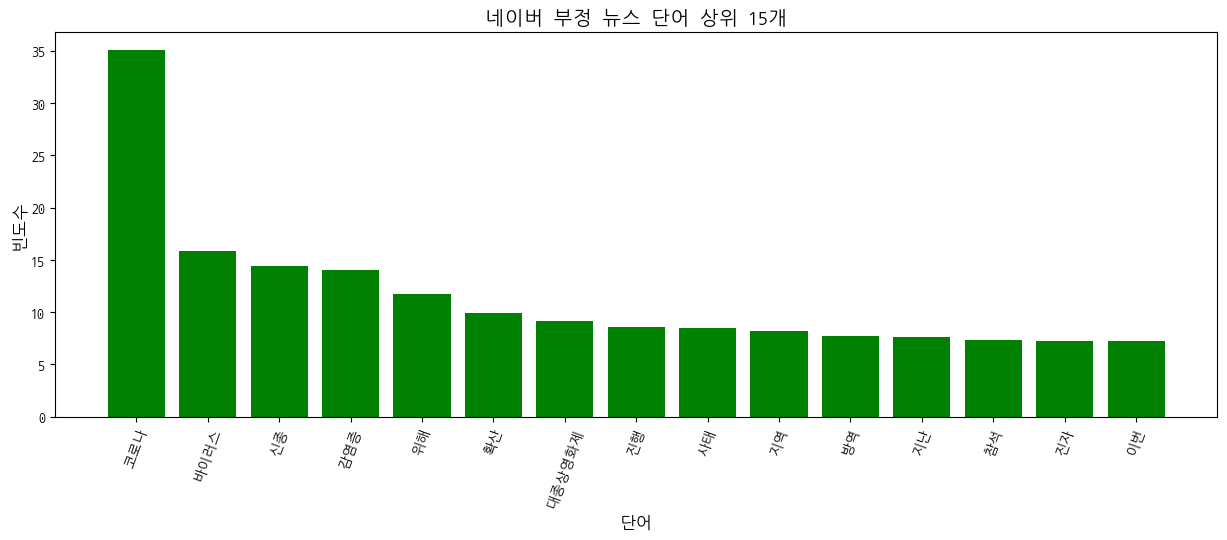

In [128]:
max = 15
plt.figure(figsize=(15,5))
plt.bar(range(max),[i[1] for i in neg_words[:max]],color='green')
plt.title('네이버 부정 뉴스 단어 상위 15개',fontsize=14)
plt.xlabel('단어',fontsize=12)
plt.ylabel('빈도수',fontsize=12)
# x축 단어 표시
plt.xticks(range(max), [i[0] for i in neg_words[:max]],rotation=70)
plt.show()